# 臉部驗證

## 使用Face-Recognition套件

## 載入相關套件

In [1]:
# 載入相關套件
import face_recognition
import numpy as np
from matplotlib import pyplot as plt

## 載入並顯示圖檔

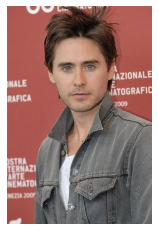

In [4]:
# 載入圖檔
known_image_1 = face_recognition.load_image_file("./images_face/jared_1.jpg")
known_image_2 = face_recognition.load_image_file("./images_face/jared_2.jpg")
known_image_3 = face_recognition.load_image_file("./images_face/jared_3.jpg")
known_image_4 = face_recognition.load_image_file("./images_face/obama.jpg")

# 標記圖檔名稱
names = ["jared_1.jpg", "jared_2.jpg", "jared_3.jpg", "obama.jpg"]

# 顯示圖像
unknown_image = face_recognition.load_image_file("./images_face/jared_4.jpg")
plt.imshow(unknown_image)
plt.axis('off')
plt.show()

## 圖像編碼

In [6]:
# 圖像編碼
known_image_1_encoding = face_recognition.face_encodings(known_image_1)[0]
known_image_2_encoding = face_recognition.face_encodings(known_image_2)[0]
known_image_3_encoding = face_recognition.face_encodings(known_image_3)[0]
known_image_4_encoding = face_recognition.face_encodings(known_image_4)[0]
known_encodings = [known_image_1_encoding, known_image_2_encoding, 
                   known_image_3_encoding, known_image_4_encoding]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

In [7]:
# 比對
results = face_recognition.compare_faces(known_encodings, unknown_encoding)
print(results)

[True, True, True, False]


## 使用dlib套件

## 載入相關套件

In [11]:
# 載入相關套件
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 載入模型

In [10]:
# 載入模型
pose_predictor_5_point = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
face_encoder = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")
detector = dlib.get_frontal_face_detector()

## 定義臉部編碼及比對的函數

In [12]:
# 找出哪一張臉最相似
def compare_faces_ordered(encodings, face_names, encoding_to_check):
    distances = list(np.linalg.norm(encodings - encoding_to_check, axis=1))
    return zip(*sorted(zip(distances, face_names)))


# 利用線性代數的法向量比較兩張臉的特徵點
def compare_faces(encodings, encoding_to_check):
    return list(np.linalg.norm(encodings - encoding_to_check, axis=1))

# 圖像編碼
def face_encodings(face_image, number_of_times_to_upsample=1, num_jitters=1):
    # 偵測臉部
    face_locations = detector(face_image, number_of_times_to_upsample)
    # 偵測臉部特徵點
    raw_landmarks = [pose_predictor_5_point(face_image, face_location) 
                     for face_location in face_locations]
    # 編碼
    return [np.array(face_encoder.compute_face_descriptor(face_image, 
                                    raw_landmark_set, num_jitters)) for
                                    raw_landmark_set in raw_landmarks]

## 載入圖檔並顯示

In [14]:
# 載入圖檔
known_image_1 = cv2.imread("./images_face/jared_1.jpg")
known_image_2 = cv2.imread("./images_face/jared_2.jpg")
known_image_3 = cv2.imread("./images_face/jared_3.jpg")
known_image_4 = cv2.imread("./images_face/obama.jpg")
unknown_image = cv2.imread("./images_face/jared_4.jpg")
names = ["jared_1.jpg", "jared_2.jpg", "jared_3.jpg", "obama.jpg"]

# 轉換 BGR 為 RGB
known_image_1 = known_image_1[:, :, ::-1]
known_image_2 = known_image_2[:, :, ::-1]
known_image_3 = known_image_3[:, :, ::-1]
known_image_4 = known_image_4[:, :, ::-1]
unknown_image = unknown_image[:, :, ::-1]

## 圖像編碼

In [15]:
# 圖像編碼
known_image_1_encoding = face_encodings(known_image_1)[0]
known_image_2_encoding = face_encodings(known_image_2)[0]
known_image_3_encoding = face_encodings(known_image_3)[0]
known_image_4_encoding = face_encodings(known_image_4)[0]
known_encodings = [known_image_1_encoding, known_image_2_encoding, 
                   known_image_3_encoding, known_image_4_encoding]
unknown_encoding = face_encodings(unknown_image)[0]

In [17]:
# 比對
computed_distances = compare_faces(known_encodings, unknown_encoding)
computed_distances_ordered, ordered_names = compare_faces_ordered(known_encodings, 
                                                      names, unknown_encoding)
print('比較兩張臉的法向量距離：', computed_distances)
print('排序：', computed_distances_ordered)
print('依相似度排序：', ordered_names)

比較兩張臉的法向量距離： [0.3998327850880958, 0.4104153798439364, 0.3913189516694114, 0.9053701677487068]
排序： (0.3913189516694114, 0.3998327850880958, 0.4104153798439364, 0.9053701677487068)
依相似度排序： ('jared_3.jpg', 'jared_1.jpg', 'jared_2.jpg', 'obama.jpg')
